In [13]:
import numpy as np
import scipy as sp
import constants as c
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from simu import Simu

In [14]:
z_min = 0.0*c.AU
z_max = 0.8*c.AU
N_z = 100
z_grid = np.linspace(z_min,z_max,N_z)


q = -1./2
ps = -3./4.
p = ps-0.5*(3.+q)

r = 8.5*c.AU

T0 = 280.
sigma0 = 2000.

c0 = np.sqrt(c.kB*T0/c.mg)
h0 = np.sqrt(c.kB*T0*c.AU**3./(c.G*c.Mstar*c.mg))
hg = h0*(r/c.AU)**((q+3.)/2.)
T = T0*(r/c.AU)**q
c_s = np.sqrt(c.kB*T/c.mg)

OmegaK_mid = np.sqrt(c.G*c.Mstar/r**3.)
OmegaK =  OmegaK_mid*(1.+(z_grid/r)**2.)**(-3./4.) 
#Omegag =  OmegaK_mid*(1.+0.5*(hg/r)**2.*(p+q+0.5*q*(z_grid/hg)**2.))



OmegaK_tl =  OmegaK_mid*(1.+0.4*(hg/r)**2.*(p+q+q*0.5*(z_grid**2/hg**2)))




rho_0 = sigma0/(np.sqrt(2.*np.pi)*h0)
rho_g = rho_0*(r/c.AU)**p*np.exp(-z_grid**2/(2.*hg**2.))


In [15]:
P_g =  rho_g*c_s**2
dP_dr = P_g/r*(p+q+((q+3)*(z_grid**4/(4.*hg**4))))
dP_dr = P_g/r*(p+q+(0.5*(q+3)*(z_grid**2/(hg**2))))

In [16]:
A = r*OmegaK**2.
B = dP_dr/rho_g

eta = -B/A

In [17]:
eta_tl = -(hg/r)**2.*(p+q+0.5*(q+3.)*(z_grid/hg)**2)

In [18]:
eta_naka = 1.81e-3*np.sqrt(r/c.AU) #Nakagawa 87

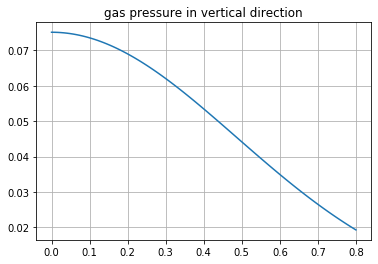

In [19]:
plt.figure()
plt.plot(z_grid/c.AU,P_g)
plt.grid()
plt.title('gas pressure in vertical direction')
plt.show()

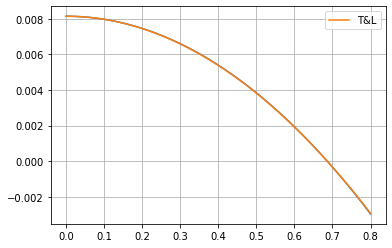

In [21]:
plt.figure()
plt.plot(z_grid/c.AU,eta)
plt.plot(z_grid/c.AU,eta_tl,label='T&L')
plt.legend()
plt.grid()
plt.show()

In [22]:
z_x = np.sqrt(-2.*(p+q)/(q+3.))*hg
print(z_x/c.AU)

0.6859992908207782


### Radial distribution

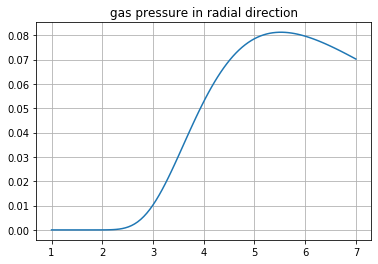

In [23]:
r_min = 1.0*c.AU
r_max = 7.0*c.AU
N_r = 100
r_grid = np.linspace(r_min,r_max,N_r)

z= 0.4*c.AU

hg = h0*(r_grid/c.AU)**((q+3.)/2.)
T = T0*(r_grid/c.AU)**q
c_s = np.sqrt(c.kB*T/c.mg)
rho_g = rho_0*(r_grid/c.AU)**p*np.exp(-z**2/(2.*hg**2.))
P_g_r =  rho_g*c_s**2
plt.figure()
plt.plot(r_grid/c.AU,P_g_r)
plt.grid()
plt.title('gas pressure in radial direction')
plt.show()

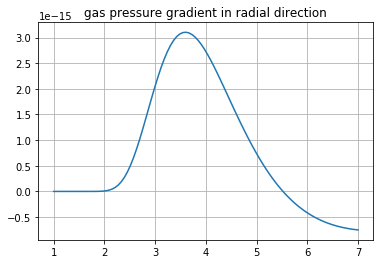

In [24]:

dP_dr_r = P_g_r/r_grid*(p+q+((q+3.)*(z**4/(4.*hg**4))))
dP_dr_r = P_g_r/r_grid*(p+q+(0.5*(q+3.)*(z**2/(hg**2))))
plt.figure()
plt.plot(r_grid/c.AU,dP_dr_r)
plt.grid()
plt.title('gas pressure gradient in radial direction')
plt.show()